# Importing data
All files are in the folder "data" in the same directory as the notebook. Files names are train.csv and test.csv. The data is loaded using pandas.

In [34]:
import pandas as pd

train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

train_columns = ['qa_id', 'question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host']



# 1. Train data

In [35]:
X_train = train_data[train_columns]
y_train = train_data.drop(train_columns, axis=1)

## 1.1 Training features data example

In [36]:
X_train.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,host
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,photo.stackexchange.com
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,rpg.stackexchange.com
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,electronics.stackexchange.com
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,judaism.stackexchange.com
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,graphicdesign.stackexchange.com


## 1.2 Training features data columns
### Training data consinsts of 11 columns:
* 1 column with question ID
* 4 columns with features of the question (title, body, username, user page)
* 3 columns with features of the answer (body, username, user page)
* 3 columns with general features (url, category, host)

Features formats:
* title, body, answer body - text
* id, username, user page, url, category, host - categorical
* **none numerical features**

## 1.3 Training data aspects example

In [37]:
y_train.head()

,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,question_not_really_a_question,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,1.000000,0.333333,0.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.0,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1.000000,1.000000,0.000000,0.5,1.0,1.0,0.444444,0.444444,0.666667,0.0,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,0.888889,0.666667,0.000000,1.0,1.0,1.0,0.666667,0.444444,0.333333,0.0,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,0.888889,0.666667,0.666667,1.0,1.0,1.0,0.444444,0.444444,0.000000,0.0,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,1.000000,0.666667,0.000000,1.0,1.0,1.0,0.666667,0.666667,0.000000,0.0,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


## 1.4 Training data aspects columns

In [38]:
answer_features = []
question_features = []

for column in y_train.columns:
    if column.startswith('answer'):
        answer_features.append(column)
    else:
        question_features.append(column)

answer_features, len(answer_features), question_features, len(question_features)

(['answer_helpful',
  'answer_level_of_information',
  'answer_plausible',
  'answer_relevance',
  'answer_satisfaction',
  'answer_type_instructions',
  'answer_type_procedure',
  'answer_type_reason_explanation',
  'answer_well_written'],
 9,
 ['question_asker_intent_understanding',
  'question_body_critical',
  'question_conversational',
  'question_expect_short_answer',
  'question_fact_seeking',
  'question_has_commonly_accepted_answer',
  'question_interestingness_others',
  'question_interestingness_self',
  'question_multi_intent',
  'question_not_really_a_question',
  'question_opinion_seeking',
  'question_type_choice',
  'question_type_compare',
  'question_type_consequence',
  'question_type_definition',
  'question_type_entity',
  'question_type_instructions',
  'question_type_procedure',
  'question_type_reason_explanation',
  'question_type_spelling',
  'question_well_written'],
 21)

### Training values data consinsts of 30 columns:

* 9 columns with features of the answer (helpfulness, relevance and etc.)
* 21 columns with features of the question (conversational, fact_seeking, etc.)



# 2. Test data

In [39]:
test_data.head()
X_test = test_data

In [40]:
X_train_shape = X_train.shape
# y_train_shape = y_train.shape
X_test_shape = test_data.shape
print("X_train Shape : ", X_train_shape)
print("X_test Shape : ", X_test_shape)


print(f"Ratio of train data to test data: {100*round(X_test_shape[0]/X_train_shape[0],2)}%")


X_train Shape :  (6079, 11)
X_test Shape :  (476, 11)
Ratio of train data to test data: 8.0%


# 3. Categorical Features

## 3.1 Categorical features uniquess

In [41]:
categorical_features = ['qa_id', 'question_user_name', 'question_user_page', 'answer_user_name',
                         'answer_user_page', 'url', 'category', 'host']

print("In train data:")
for i in categorical_features:
    print(f'Possible values of feature {i} - {train_data[i].nunique()}')

print("\nIn test data:")
for i in categorical_features:
    print(f'Possible values of feature {i} - {test_data[i].nunique()}')

In train data:
Possible values of feature qa_id - 6079
Possible values of feature question_user_name - 3215
Possible values of feature question_user_page - 3422
Possible values of feature answer_user_name - 4114
Possible values of feature answer_user_page - 4430
Possible values of feature url - 3583
Possible values of feature category - 5
Possible values of feature host - 63

In test data:
Possible values of feature qa_id - 476
Possible values of feature question_user_name - 467
Possible values of feature question_user_page - 474
Possible values of feature answer_user_name - 363
Possible values of feature answer_user_page - 367
Possible values of feature url - 476
Possible values of feature category - 5
Possible values of feature host - 55


### 3.1.1 Features with high number of unique values:
* id - 6079
* question_username - 3215
* question_user_page - 3422
* answer_username - 4114
* answer_user_page - 4420
* url - 2583

Those features **will (probably) be dropped**  beacuse of high number of cardinality

### 3.1.2 Features with low number of unique values:
* category - 5
* host - 63

Those features **will be encoded** with one-hot encoding or binary encoding

### 3.1.3 Checking null values number

In [42]:
print("In train data:")
null_categories_number = train_data['category'].isnull().sum()
null_host_number = train_data['host'].isnull().sum()
print(f"Number of null values in category or host feature: {null_categories_number + null_host_number}")

print("\nIn test data:")
null_categories_number = test_data['category'].isnull().sum()
null_host_number = test_data['host'].isnull().sum()
print(f"Number of null values in category or host feature: {null_categories_number + null_host_number}")



In train data:
Number of null values in category or host feature: 0

In test data:
Number of null values in category or host feature: 0


## 3.2 Categorical features distribution in train and test data
Only for "category" feature

### Train data

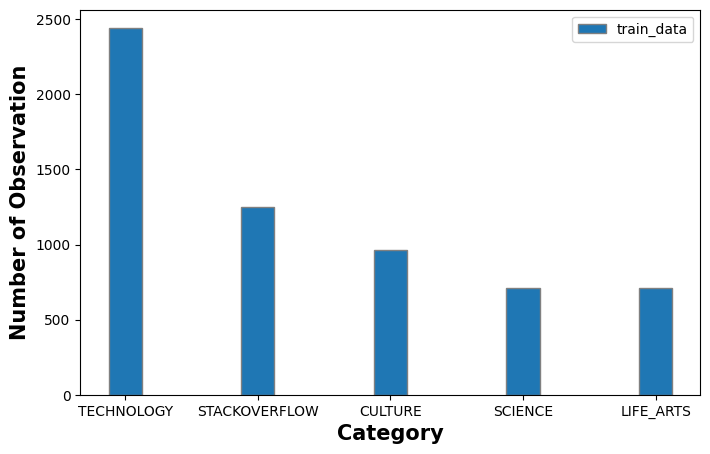

In [43]:
import matplotlib.pyplot as plt
import numpy as np
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 5))

# set height of bar
train_data_category = X_train['category'].value_counts()

# Set position of bar on X axis
br1 = np.arange(len(train_data_category))


# Make the plot
plt.bar(br1, train_data_category, width = barWidth,
		edgecolor ='grey', label ='train_data')

# Adding Xticks
plt.xlabel('Category', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of Observation', fontweight ='bold', fontsize = 15)
plt.xticks([r for r in range(len(train_data_category))],
		train_data_category.index)

plt.legend()
plt.show()

### Test data

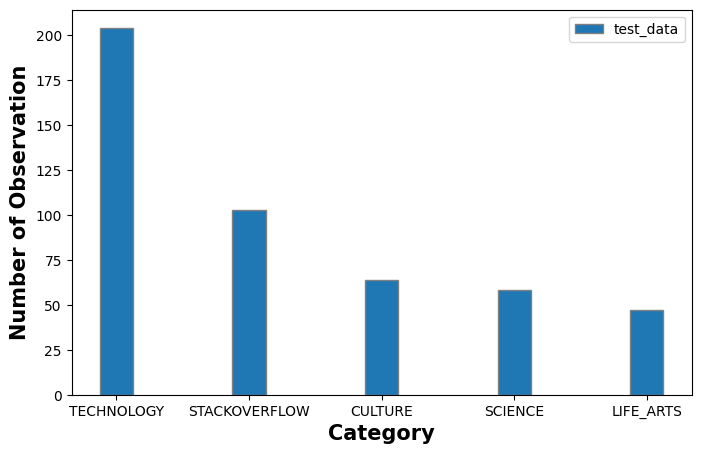

In [44]:
import matplotlib.pyplot as plt
import numpy as np
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 5))

# set height of bar
train_data_category = test_data['category'].value_counts()

# Set position of bar on X axis
br1 = np.arange(len(train_data_category))


# Make the plot
plt.bar(br1, train_data_category, width = barWidth,
		edgecolor ='grey', label ='test_data')

# Adding Xticks
plt.xlabel('Category', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of Observation', fontweight ='bold', fontsize = 15)
plt.xticks([r for r in range(len(train_data_category))],
		train_data_category.index)

plt.legend()
plt.show()

# 4. Text Features

## 4.1 Text preprocessing

Script for text preprocessing borrowed from other notebooks

In [45]:
import re
from nltk.stem.snowball import SnowballStemmer

# https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490
def decontracted(phrase):
    phrase = re.sub(r"(W|w)on(\'|\’)t ", "will not ", phrase)
    phrase = re.sub(r"(C|c)an(\'|\’)t ", "can not ", phrase)
    phrase = re.sub(r"(Y|y)(\'|\’)all ", "you all ", phrase)
    phrase = re.sub(r"(Y|y)a(\'|\’)ll ", "you all ", phrase)
    phrase = re.sub(r"(I|i)(\'|\’)m ", "i am ", phrase)
    phrase = re.sub(r"(A|a)isn(\'|\’)t ", "is not ", phrase)
    phrase = re.sub(r"n(\'|\’)t ", " not ", phrase)
    phrase = re.sub(r"(\'|\’)re ", " are ", phrase)
    phrase = re.sub(r"(\'|\’)d ", " would ", phrase)
    phrase = re.sub(r"(\'|\’)ll ", " will ", phrase)
    phrase = re.sub(r"(\'|\’)t ", " not ", phrase)
    phrase = re.sub(r"(\'|\’)ve ", " have ", phrase)
    return phrase

def clean_text(x):
    x = str(x)
    for punct in "/-'":
        x = x.replace(punct, ' ')
    for punct in '&':
        x = x.replace(punct, f' {punct} ')
    for punct in '?!.,"#$%\'()*+-/:;<=>@[\\]^_`{|}~' + '“”’':
        x = x.replace(punct, '')
    return x

def clean_numbers(x):
    x = re.sub('[0-9]{5,}', '12345', x)
    x = re.sub('[0-9]{4}', '1234', x)
    x = re.sub('[0-9]{3}', '123', x)
    x = re.sub('[0-9]{2}', '12', x)
    return x

# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]


stemmer = SnowballStemmer("english")

# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = clean_text(sentance)
        sent = clean_numbers(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(stemmer.stem(e) for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text


def special_symbols(string):
    pattern = r'[^a-zA-Z0-9\s]'
    matches = re.finditer(pattern, string, re.MULTILINE)
    return len([_ for _ in matches])


In [46]:
#######################################################################################################
X_train['preprocessed_question_title'] = preprocess_text(X_train['question_title'].values)
X_train['preprocessed_question_body'] = preprocess_text(X_train['question_body'].values)
X_train['preprocessed_answer'] = preprocess_text(X_train['answer'].values)
#######################################################################################################
X_test['preprocessed_question_title'] = preprocess_text(X_test['question_title'].values)
X_test['preprocessed_question_body'] = preprocess_text(X_test['question_body'].values)
X_test['preprocessed_answer'] = preprocess_text(X_test['answer'].values)
#######################################################################################################
X_train['question_title_length'] = X_train['preprocessed_question_title'].apply(lambda x: len(x.split()))
X_test['question_title_length'] = X_test['preprocessed_question_title'].apply(lambda x: len(x.split()))
#######################################################################################################
X_train['question_body_length'] = X_train['preprocessed_question_body'].apply(lambda x: len(x.split()))
X_test['question_body_length'] = X_test['preprocessed_question_body'].apply(lambda x: len(x.split()))
#######################################################################################################
X_train['answer_length'] = X_train['preprocessed_answer'].apply(lambda x: len(x.split()))
X_test['answer_length'] = X_test['preprocessed_answer'].apply(lambda x: len(x.split()))
#######################################################################################################
X_train['question_title_special_symbols'] = X_train['question_title'].apply(special_symbols)
X_train['question_body_special_symbols'] = X_train['question_body'].apply(special_symbols)
X_train['answer_special_symbols'] = X_train['answer'].apply(special_symbols)
#######################################################################################################
X_test['question_title_special_symbols'] = X_test['question_title'].apply(special_symbols)
X_test['question_body_special_symbols'] = X_test['question_body'].apply(special_symbols)
X_test['answer_special_symbols'] = X_test['answer'].apply(special_symbols)
#######################################################################################################

100%|██████████| 6079/6079 [00:00<00:00, 14090.26it/s]
/tmp/ipykernel_9864/208519387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['preprocessed_question_title'] = preprocess_text(X_train['question_title'].values)
100%|██████████| 6079/6079 [00:04<00:00, 1305.68it/s]
/tmp/ipykernel_9864/208519387.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['preprocessed_question_body'] = preprocess_text(X_train['question_body'].values)
100%|██████████| 6079/6079 [00:04<00:00, 1285.91it/s]
/tmp/

### 4.1.1 New text features example

In [47]:
X_train.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,host,preprocessed_question_title,preprocessed_question_body,preprocessed_answer,question_title_length,question_body_length,answer_length,question_title_special_symbols,question_body_special_symbols,answer_special_symbols
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,photo.stackexchange.com,lose use extens tube instead macro len,play around macro photographi cheap read rever...,got extens tube skinni lose use tube consider ...,7,88,82,1,34,30
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,rpg.stackexchange.com,distinct citi sprawl metroplex downtown commer...,tri understand kind place spam valu p 123 refe...,might help look definit spam zone p 123 spam z...,7,80,48,5,30,14
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,electronics.stackexchange.com,maximum protus length hole compon pin,work pcb hole compon side board top side board...,even need groov make sever product use hole co...,6,68,105,1,20,23
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,judaism.stackexchange.com,affidavit use beit din,affidavit understand basic sign document given...,send affidavit disput rashi rabbeinu tam devar...,4,36,73,1,11,475
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,graphicdesign.stackexchange.com,make binari imag photoshop,tri make binari imag want look imag black whit...,check imag trace adob illustr like use python ...,4,40,31,1,14,27


## 4.2 Titles

In [48]:
print("In train data:")
uniqe_question_title = X_train['preprocessed_question_title'].nunique()

print("Number of unique question titles: ", uniqe_question_title, "out of", X_train.shape[0], "data points")

print("Number of duplicate question titles: ", X_train.shape[0] - uniqe_question_title)

print("In test data:")
uniqe_question_title = X_test['preprocessed_question_title'].nunique()

print("Number of unique question titles: ", uniqe_question_title, "out of", X_test.shape[0], "data points")

print("Number of duplicate question titles: ", X_test.shape[0] - uniqe_question_title)

In train data:
Number of unique question titles:  3583 out of 6079 data points
Number of duplicate question titles:  2496
In test data:
Number of unique question titles:  476 out of 476 data points
Number of duplicate question titles:  0


### 4.2.1 Titles length distribution

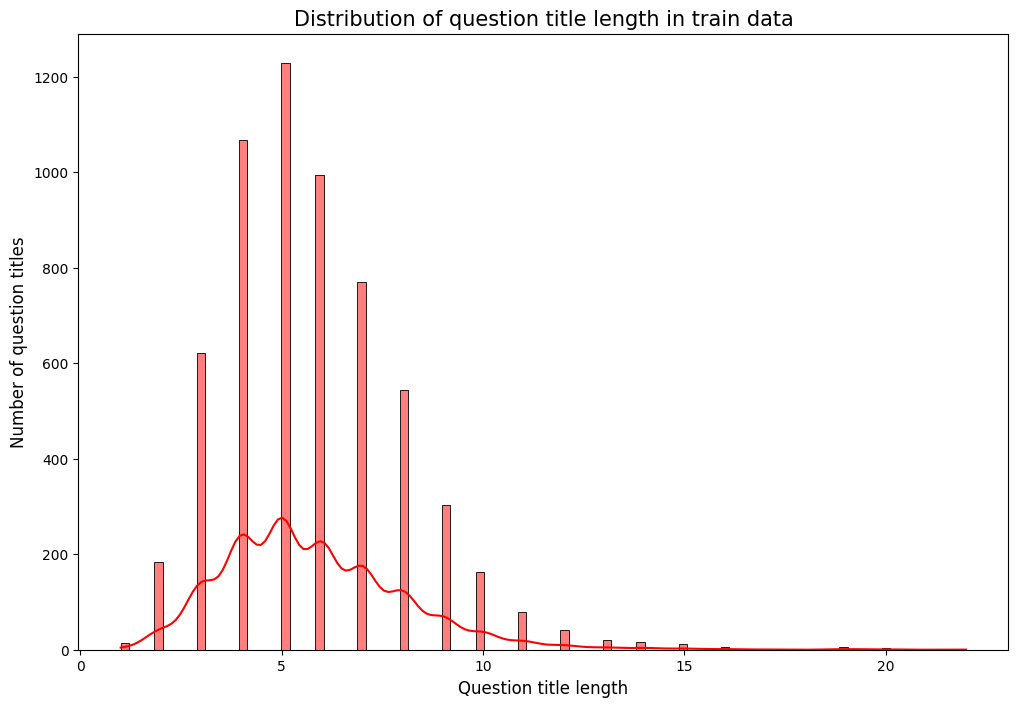

In [69]:
import seaborn as sns
# Create plot of title length distribution
plt.figure(figsize=(12, 8))
sns.histplot(X_train['question_title_length'], color='red', kde=True, bins=100)

plt.title('Distribution of question title length in train data', fontsize=15)
plt.xlabel('Question title length', fontsize=12)
plt.ylabel('Number of question titles', fontsize=12)
plt.show()

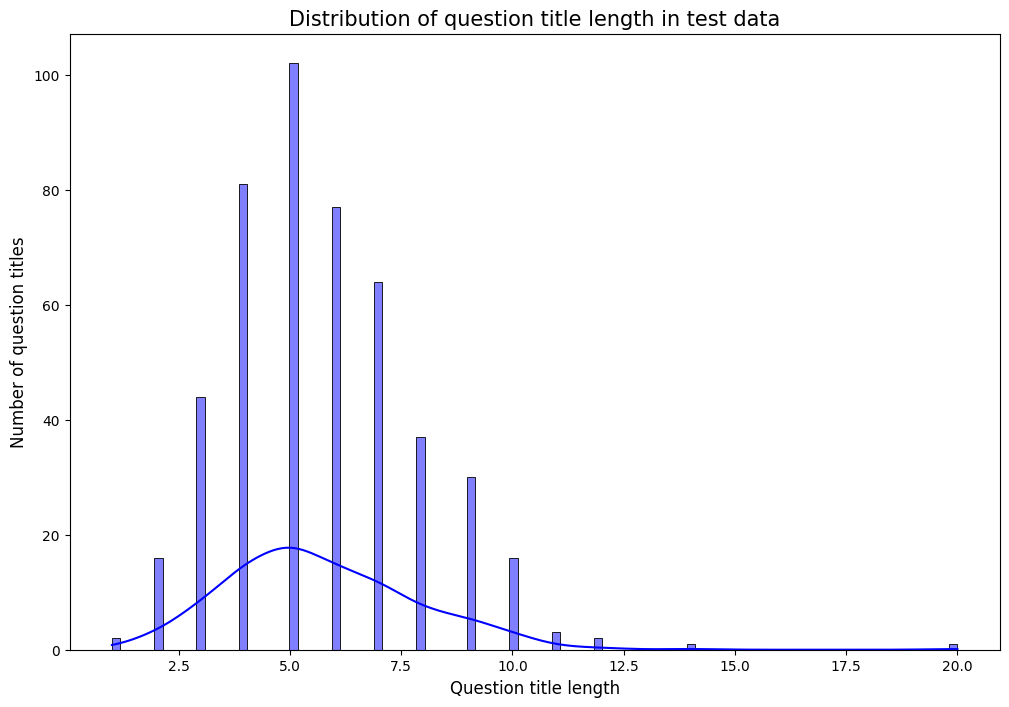

In [68]:
plt.figure(figsize=(12, 8))
sns.histplot(X_test['question_title_length'], color='blue', kde=True, bins=100)
plt.title('Distribution of question title length in test data', fontsize=15)
plt.xlabel('Question title length', fontsize=12)
plt.ylabel('Number of question titles', fontsize=12)
plt.show()

### 4.2.2 Titles special symbols distribution

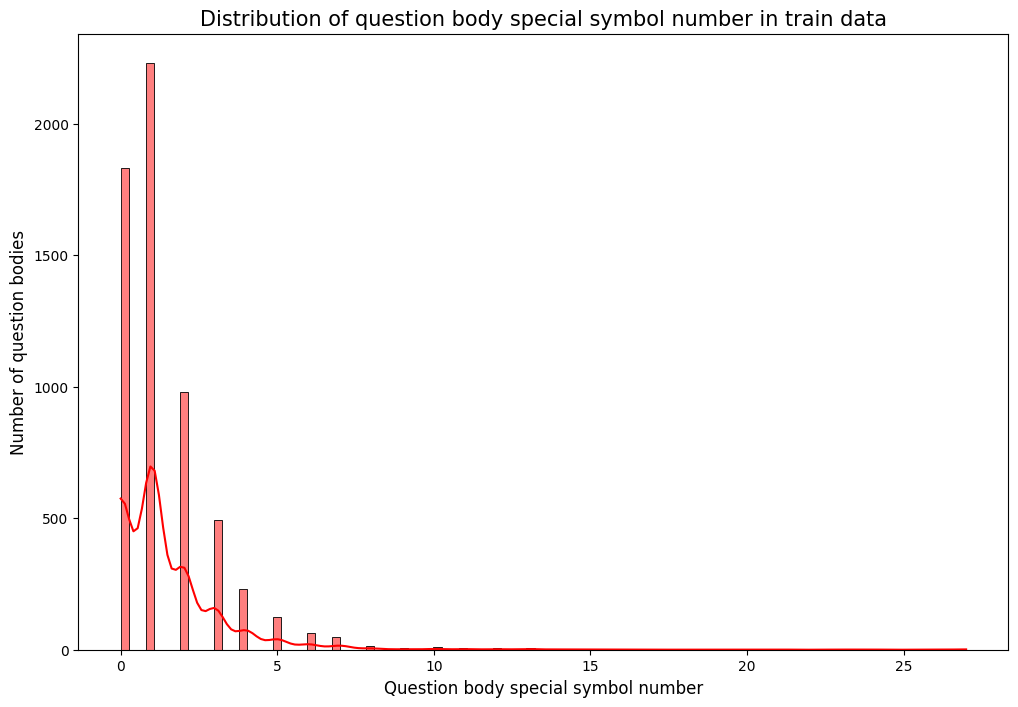

In [85]:
plt.figure(figsize=(12, 8))
sns.histplot(X_train['question_title_special_symbols'], color='red', kde=True, bins=100)
plt.title('Distribution of question body special symbol number in train data', fontsize=15)
plt.xlabel('Question body special symbol number', fontsize=12)
plt.ylabel('Number of question bodies', fontsize=12)
plt.show()

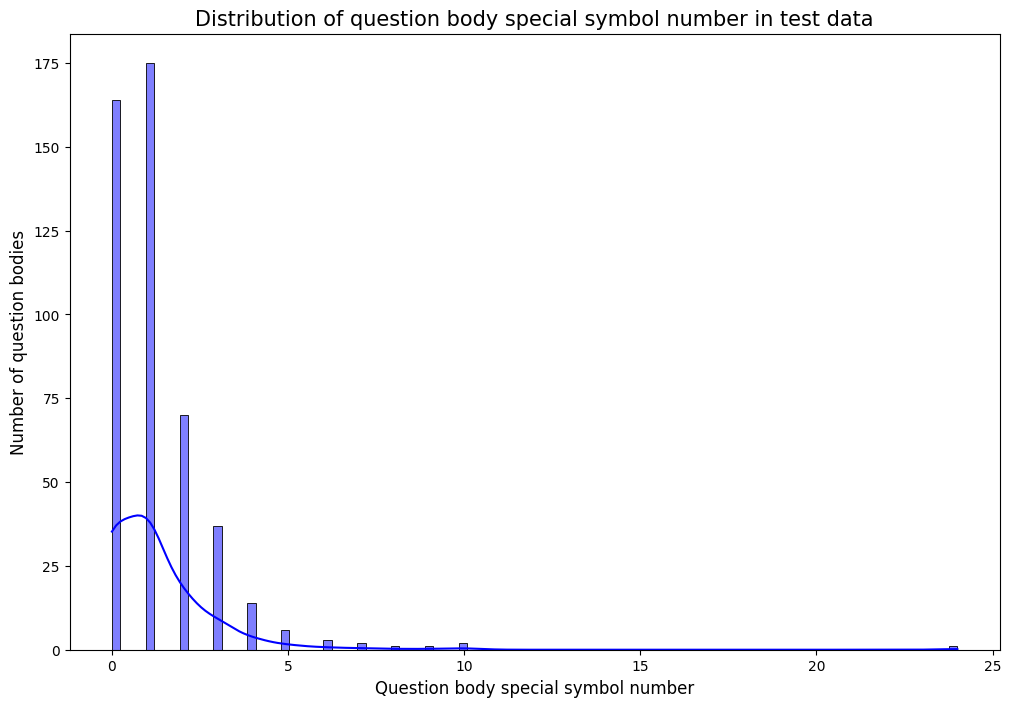

In [84]:
plt.figure(figsize=(12, 8))
sns.histplot(X_test['question_title_special_symbols'], color='blue', kde=True, bins=100)
plt.title('Distribution of question body special symbol number in test data', fontsize=15)
plt.xlabel('Question body special symbol number', fontsize=12)
plt.ylabel('Number of question bodies', fontsize=12)
plt.show()

### 4.2.3 Most common words in titles

In [53]:
#Count the most common words in the question title
from collections import Counter
cnt = Counter()
for text in X_train["preprocessed_question_title"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)


[('use', 495),
 ('not', 227),
 ('get', 199),
 ('12', 195),
 ('file', 182),
 ('differ', 179),
 ('chang', 149),
 ('make', 142),
 ('work', 131),
 ('page', 124)]

### 4.2.4 Titles summary
* There are duplicates in titles (because there might be several answers for one question)
* Max length of title is 22 words in train data and 20 words in test data
* Min length of title is 1 word in train data and 1 word in test data
* Distribution of special symbols is similar in test data and train data
* The word "use" is the most frequent word in titles both in train and test data

## 4.3 Questions bodies

In [54]:
print("In train data:")
uniqe_question_bodies = X_train['preprocessed_question_body'].nunique()

print("Number of unique question bodies: ", uniqe_question_bodies, "out of", X_train.shape[0], "data points")

print("Number of duplicate question bodies: ", X_train.shape[0] - uniqe_question_bodies)

print("In test data:")
uniqe_question_bodies = X_test['preprocessed_question_body'].nunique()

print("Number of unique question bodies: ", uniqe_question_bodies, "out of", X_test.shape[0], "data points")

print("Number of duplicate question bodies: ", X_test.shape[0] - uniqe_question_bodies)

In train data:
Number of unique question bodies:  3583 out of 6079 data points
Number of duplicate question bodies:  2496
In test data:
Number of unique question bodies:  476 out of 476 data points
Number of duplicate question bodies:  0


After comparing above data to uniqness of titles we can see that there are no different questions with the same title. So we can maybe assume that **there is no need to use titles in our model**.

### 4.3.1 Questions bodies length distribution

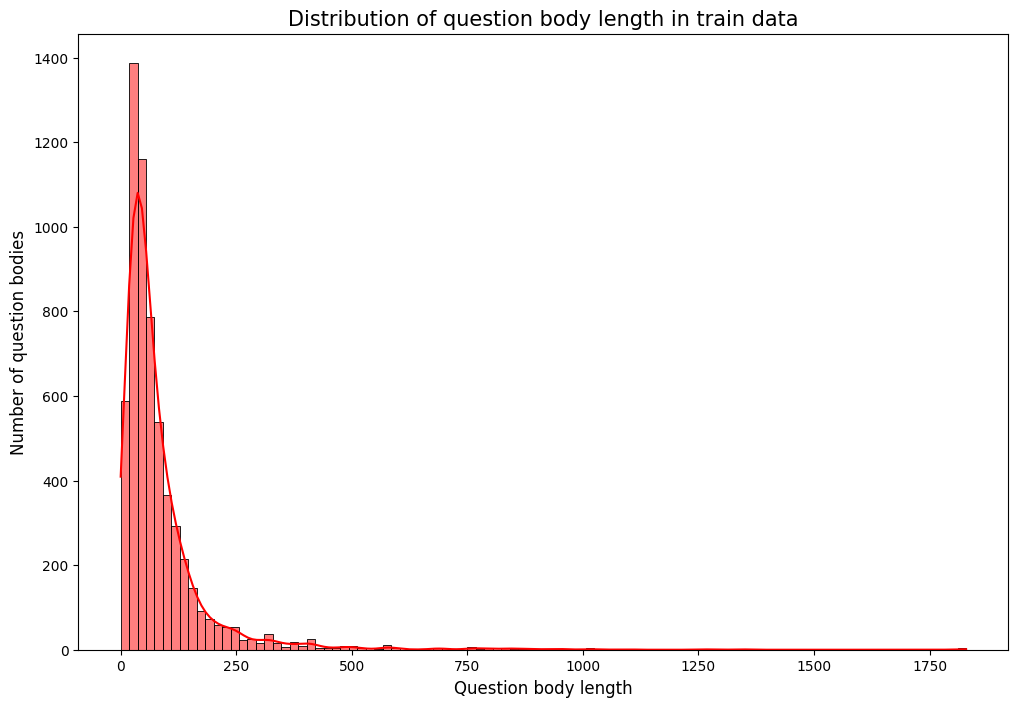

In [62]:
plt.figure(figsize=(12, 8))
sns.histplot(X_train['question_body_length'], color='red', kde=True, bins=100)

plt.title('Distribution of question body length in train data', fontsize=15)
plt.xlabel('Question body length', fontsize=12)
plt.ylabel('Number of question bodies', fontsize=12)
plt.show()

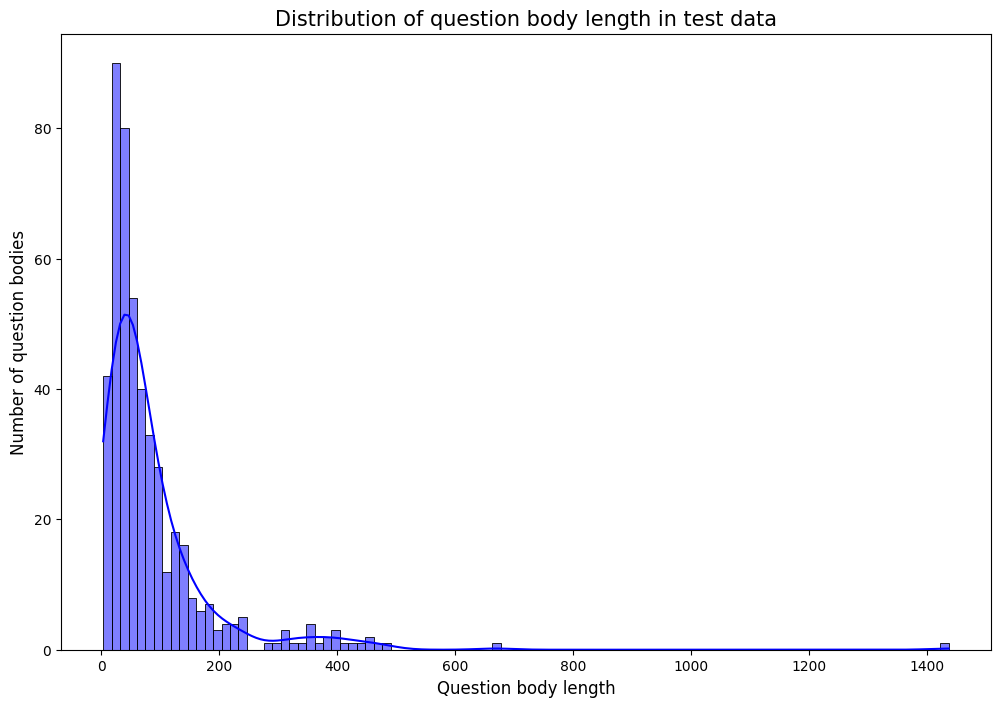

In [63]:
plt.figure(figsize=(12, 8))
sns.histplot(X_test['question_body_length'], color='blue', kde=True, bins=100)

plt.title('Distribution of question body length in test data', fontsize=15)
plt.xlabel('Question body length', fontsize=12)
plt.ylabel('Number of question bodies', fontsize=12)
plt.show()

### 4.3.2 Questions bodies special symbols distribution

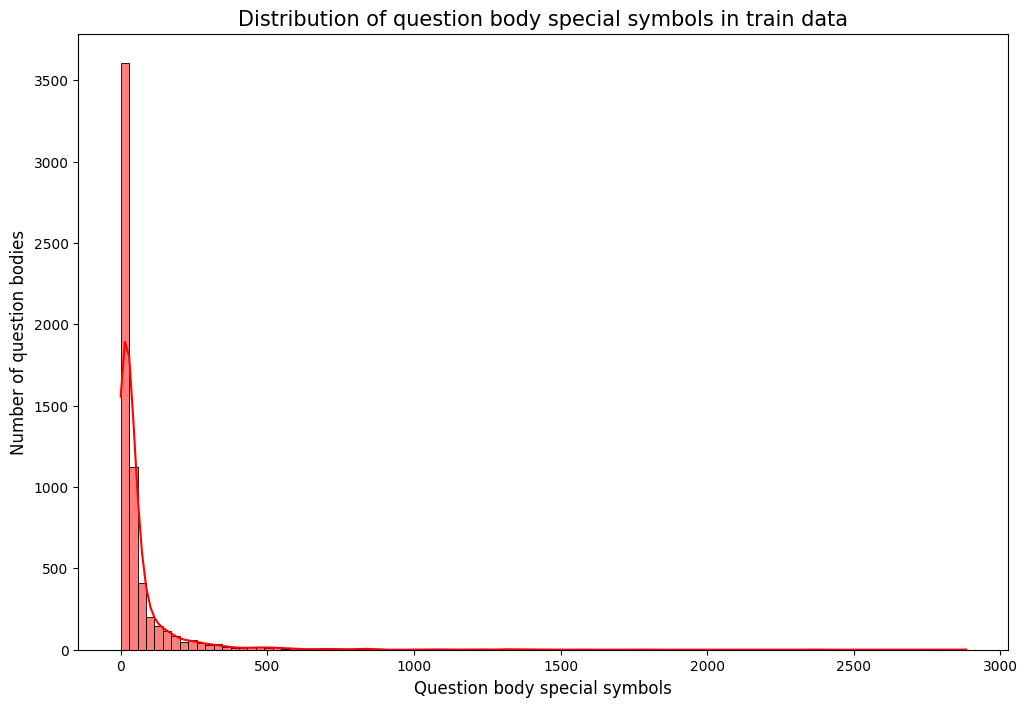

In [64]:
plt.figure(figsize=(12, 8))
sns.histplot(X_train['question_body_special_symbols'], color='red', kde=True, bins=100)

plt.title('Distribution of question body special symbols in train data', fontsize=15)
plt.xlabel('Question body special symbols', fontsize=12)
plt.ylabel('Number of question bodies', fontsize=12)
plt.show()

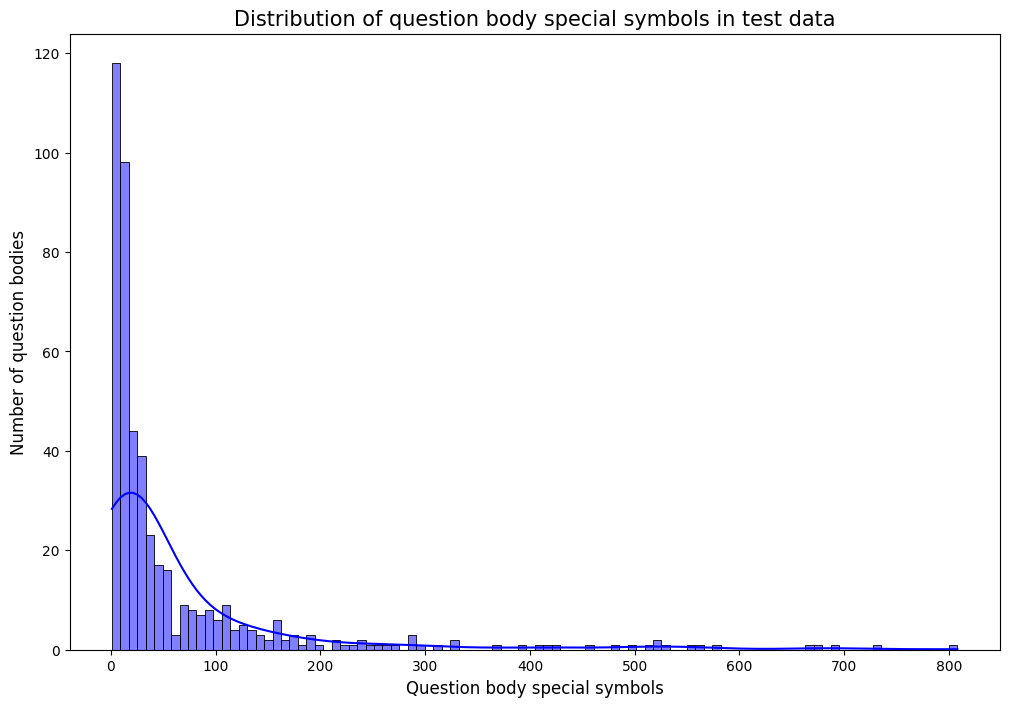

In [65]:
plt.figure(figsize=(12, 8))
sns.histplot(X_test['question_body_special_symbols'], color='blue', kde=True, bins=100)

plt.title('Distribution of question body special symbols in test data', fontsize=15)
plt.xlabel('Question body special symbols', fontsize=12)
plt.ylabel('Number of question bodies', fontsize=12)
plt.show()

### 4.3.3 Most common words in questions bodies

In [72]:
#Count the most common words in the question title
from collections import Counter
cnt = Counter()
for text in X_train["preprocessed_question_body"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)


[('gt', 8926),
 ('12', 8541),
 ('lt', 7621),
 ('1', 5258),
 ('0', 4716),
 ('use', 4627),
 ('not', 3970),
 ('123', 3735),
 ('2', 3558),
 ('get', 2704)]

### 4.3.4 Question bodies summary
* There are duplicates in questions (because there might be several answers for one question)
* Max length of question is 1800 words in train data and 1500 words in test data
* Almost all questions have length less than 500 words
* Min length of question is 0 words (!!!!!) in train data and 0 word in test data (!!!!!) (AFTER PREPROCESSING - might need another preprocessing method. It might also mean that **we need titles after all**)
* Distribution of special symbols is similar in test data and train data, but in train data there are outliers with more than 1000 special symbols (up to 3000!!!)
* The words used for comparision ("greater than", "less than", etc.) and numbers are the most frequent words in questions both in train and test data

## 4.4 Answers bodies

In [75]:
print("In train data:")
uniqe_question_bodies = X_train['preprocessed_answer'].nunique()

print("Number of unique question bodies: ", uniqe_question_bodies, "out of", X_train.shape[0], "data points")

print("Number of duplicate question bodies: ", X_train.shape[0] - uniqe_question_bodies)

print("In test data:")
uniqe_question_bodies = X_test['preprocessed_answer'].nunique()

print("Number of unique question bodies: ", uniqe_question_bodies, "out of", X_test.shape[0], "data points")

print("Number of duplicate question bodies: ", X_test.shape[0] - uniqe_question_bodies)

In train data:
Number of unique question bodies:  6079 out of 6079 data points
Number of duplicate question bodies:  0
In test data:
Number of unique question bodies:  476 out of 476 data points
Number of duplicate question bodies:  0


### 4.4.1 Answers bodies length distribution

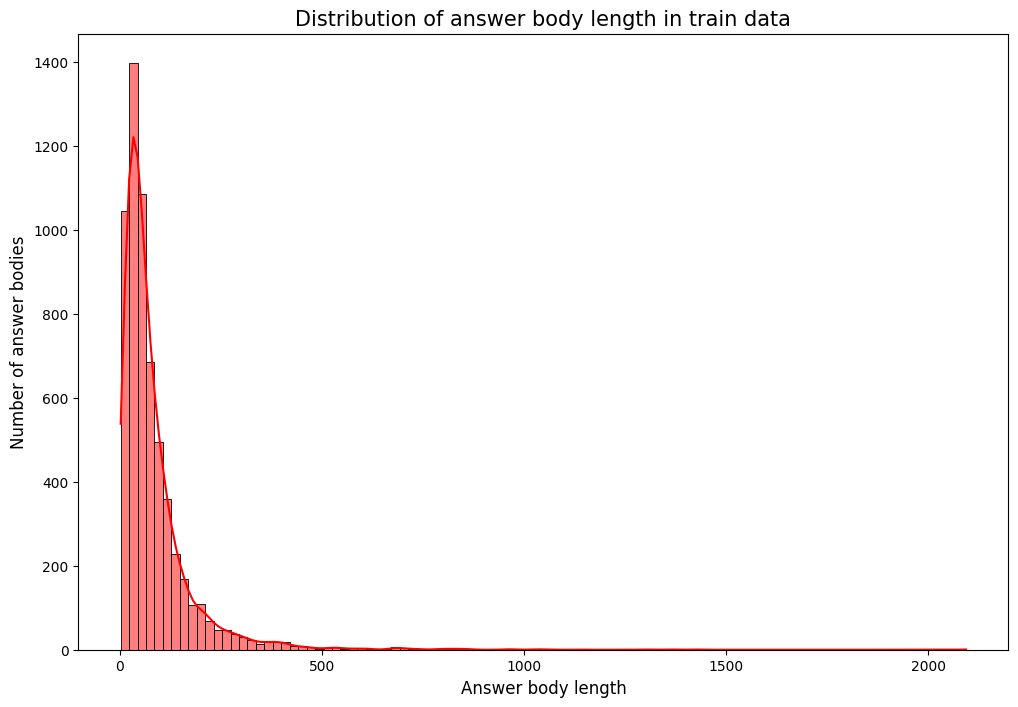

In [81]:
plt.figure(figsize=(12, 8))
sns.histplot(X_train['answer_length'], color='red', kde=True, bins=100)

plt.title('Distribution of answer body length in train data', fontsize=15)
plt.xlabel('Answer body length', fontsize=12)
plt.ylabel('Number of answer bodies', fontsize=12)
plt.show()

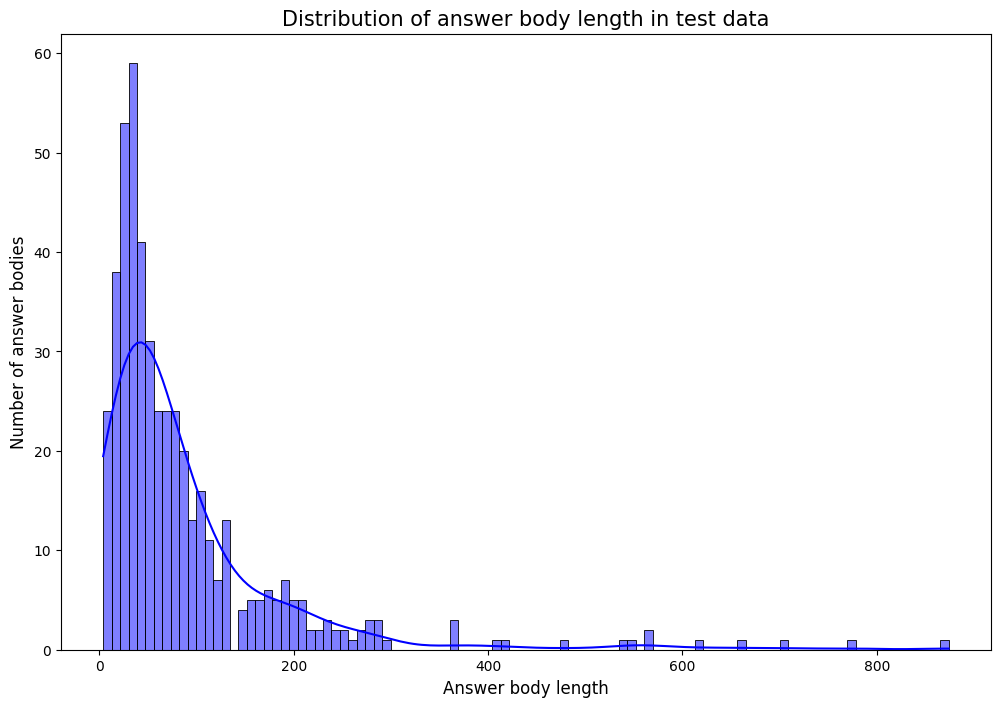

In [82]:
plt.figure(figsize=(12, 8))
sns.histplot(X_test['answer_length'], color='blue', kde=True, bins=100)

plt.title('Distribution of answer body length in test data', fontsize=15)
plt.xlabel('Answer body length', fontsize=12)
plt.ylabel('Number of answer bodies', fontsize=12)
plt.show()

### 4.4.2 Answers bodies special symbols distribution

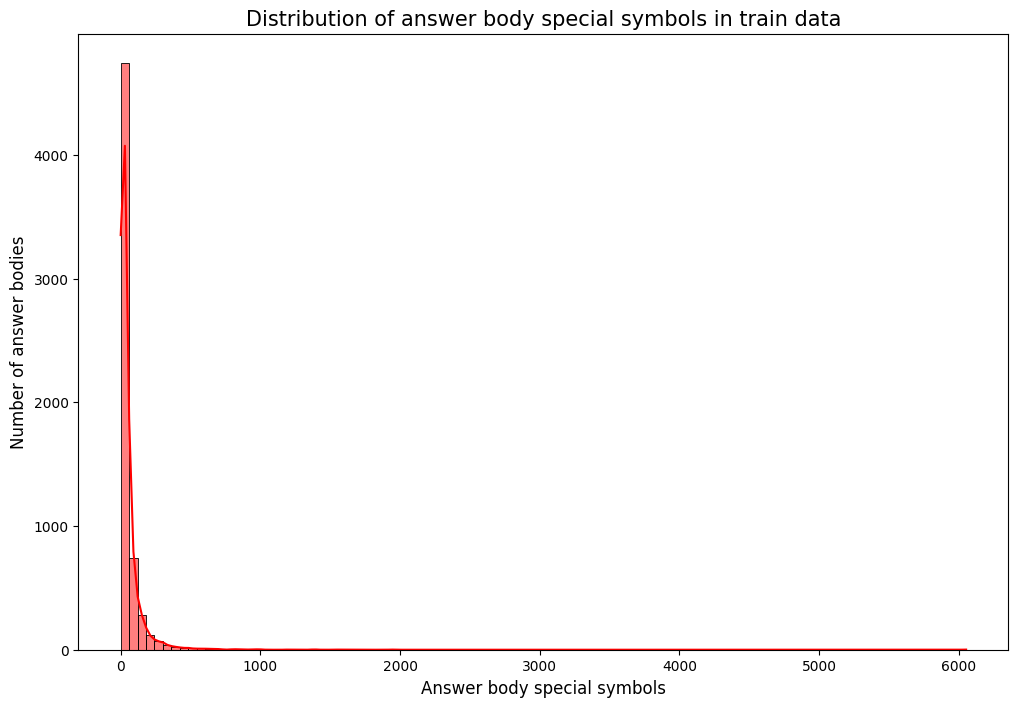

In [83]:
plt.figure(figsize=(12, 8))
sns.histplot(X_train['answer_special_symbols'], color='red', kde=True, bins=100)

plt.title('Distribution of answer body special symbols in train data', fontsize=15)
plt.xlabel('Answer body special symbols', fontsize=12)
plt.ylabel('Number of answer bodies', fontsize=12)
plt.show()

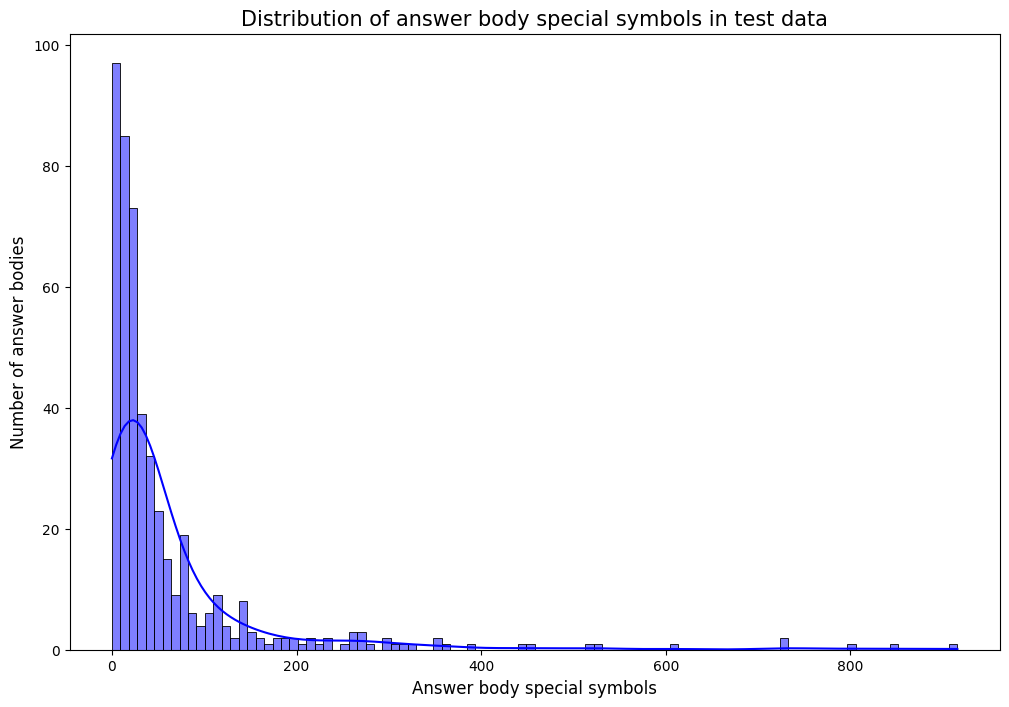

In [87]:
plt.figure(figsize=(12, 8))
sns.histplot(X_test['answer_special_symbols'], color='blue', kde=True, bins=100)

plt.title('Distribution of answer body special symbols in test data', fontsize=15)
plt.xlabel('Answer body special symbols', fontsize=12)
plt.ylabel('Number of answer bodies', fontsize=12)
plt.show()

### 4.4.3 Most common words in answers bodies

In [90]:
#Count the most common words in the question title
from collections import Counter
cnt = Counter()
for text in X_train["preprocessed_answer"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)

[('use', 5605),
 ('12', 4963),
 ('not', 4832),
 ('1', 4556),
 ('gt', 4435),
 ('123', 3717),
 ('2', 3298),
 ('lt', 2976),
 ('0', 2916),
 ('one', 2594)]

### 4.4.4 Answers bodies summary
* There are no duplicates in answers
* Max length of answer is 2200 words in train data and 1000 words in test data
* Min length of answer is 0 words (!!!!!) in train data and 0 word in test data (!!!!!) (AFTER PREPROCESSING - might need another preprocessing method.
* Distribution of special symbols is similar in test data and train data, but in train data there are outliers with more than 1000 special symbols (up to 6000!!!)
* Most common words are similar to the ones in questions titles. Those are "use", "not" and numbers

# 5. Summary
* There are duplicates in titles and questions, because of multiple answers for one question. There are no duplicates in answers tho.
* After comparing uniqness of titles and questions we can see that there are no different questions with the same title. We assumed we can skip titles but after preprocessing some questions are very short (0 words) so we might need titles after all.
* Probably the best featuers to use are:
    * category
    * host
    * Title of the question (maybe)
    * Body of the question
    * Answer